In [ ]:
# %pip install -q ultralytics
# %pip install py-cpuinfo

In [ ]:
# from ultralytics import YOLO

# model = YOLO('yolov8n.pt')

In [ ]:
# result = model.predict(
#    source='https://media.roboflow.com/notebooks/examples/dog.jpeg',
#    conf=0.25,
#    device='cpu'
# )

In [ ]:
# import cv2
# a = result[0].plot()
# b = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)

In [ ]:
# result[0]

In [ ]:
# import matplotlib.pyplot as plt
# plt.imshow(b)

In [1]:
# %cd ../..
%cd ../..

/home/saplab/thaiminhpv/EFISS/AI-model-query-service


In [2]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# model = YOLO('yolov8n.pt')
model = YOLO('trainer/runs/detect/train6/weights/best.pt')

In [ ]:
with open('./database_info.txt', 'r') as f:
    for line in f.readlines():
        print(line)
        img = line.strip()
        break

img = img.replace('yolo_resize_300x300', 'resize_600x600')



0: 640x640 (no detections), 5.8ms
Speed: 5.6ms preprocess, 5.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


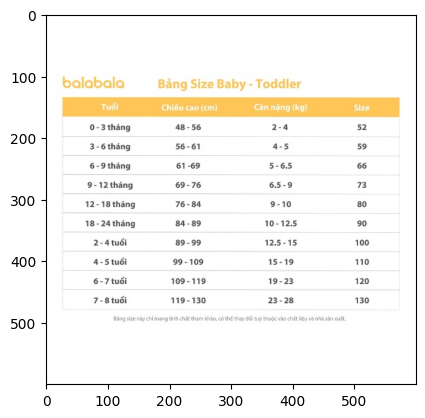

In [29]:
img = '/home/saplab/thaiminhpv/EFISS/AI-model-query-service/data/shopee/resize_600x600/shopee-balabala_vietnam/6462af4e614eb20545368955_5_shopee_balabala_vietnam.jpeg'
img = cv2.imread(img)
result = model.predict(
   source=img,
   conf=0.03,
   device='0',
   save=False,
)[0]
plot = cv2.cvtColor(result.plot(), cv2.COLOR_BGR2RGB)
plt.imshow(plot)

In [ ]:
x,y, _x, _y = list(result.boxes.xyxy[0].int())

In [ ]:
cropped = result.orig_img[y:_y, x:_x]

In [ ]:
cropped = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)
plt.imshow(cropped)

In [17]:
import numpy as np
# model = YOLO('yolov8n.pt')
# model = YOLO('trainer/runs/detect/train6/weights/best.pt')

def crop_image(img: np.ndarray) -> np.ndarray:
    """
    Crop the image using YOLOv8
    
    Args:
        img (np.ndarray): the image to crop
    
    Returns:
        np.ndarray: the cropped image, or leave the image unchanged if no object is detected
    """
    result = model.predict(
        source=img,
        conf=0.002,
        device='0',
        save=False,
    )[0]
    if len(result.boxes.xyxy) == 0:
        print("No object detected")
        return img
    x, y, _x, _y = list(result.boxes.xyxy[0].int())
    return result.orig_img[y:_y, x:_x]

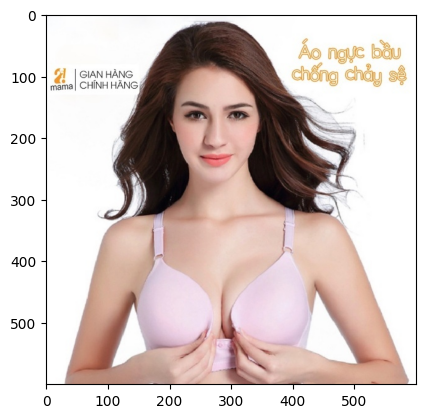


0: 640x640 1 vest, 2 slings, 1 sling dress, 5.8ms
Speed: 1.5ms preprocess, 5.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


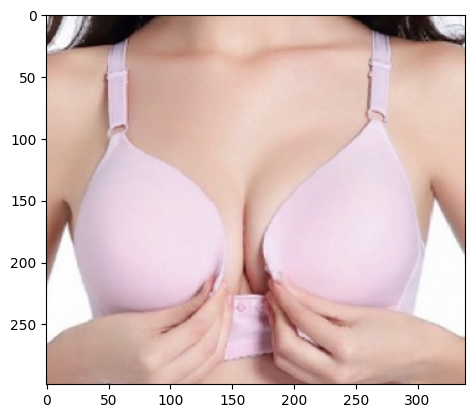

In [18]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

c_img = crop_image(img)

c_img = cv2.cvtColor(c_img, cv2.COLOR_BGR2RGB)
plt.imshow(c_img)

# Export ran model

In [ ]:
from ultralytics import YOLO
import cv2


In [ ]:
trained_model = YOLO('trainer/runs/detect/train6/weights/best.pt')

In [ ]:
trained_model

In [ ]:
trained_model.export(format='torchscript')

In [ ]:
import torch
t_model = torch.jit.load('torchscripts_models/yolo/yolov8n_12ep_640x_23-7.torchscript', map_location='cuda:0')

In [ ]:
img.shape

In [ ]:
t_img = torch.from_numpy(img)

In [ ]:
t_img.shape

In [ ]:
t_img = t_img.permute(2, 0, 1).unsqueeze(0).to('cuda:0')

In [ ]:
t_img.shape

In [ ]:
t_img.float()

In [ ]:
t_model(t_img.float())

In [7]:
'abc/xyz_crop1.jpg'[:-10]

'abc/xyz'